In [4]:
import numpy as np
import matplotlib.pyplot as plt
from green_solver import *
from scipy.fft import rfft, rfftfreq

plt.rcParams.update({
    'font.size': 14,             # Default text size
    'axes.labelsize': 24,        # Axis label size
    'axes.titlesize': 18,        # Title size
    'xtick.labelsize': 16,       # X tick label size
    'ytick.labelsize': 16,       # Y tick label size
    'legend.fontsize': 10,       # Legend text size
    'figure.titlesize': 20,      # Figure title size
})


In [7]:
omega0 = 2*np.pi*1
mass = 0.01
gamma = 2*np.pi*1e-2
t = np.linspace(0,20, 1000)

t_start = 3
t_end = 15
f_start = 0.5
f_end = 3

envelope = np.zeros_like(t)
envelope[(t>t_start) & (t<t_end)] = 1
f_tot, f_t = chirp_with_window(
    t,
    f_start=f_start,
    f_end=f_end,
    t_start=t_start,
    t_end=t_end,
    envelope=envelope
)

# convert to angular frequency
omega_d_of_t = 2.0 * np.pi * f_t

osc = DrivenHarmonicOscillator(omega0=omega0, gamma=gamma, m=mass)

x = osc.solve_via_green(t, f_tot)
x_env = osc.solve_envelope_ode_varfreq(t, envelope, omega_d_of_t)
x_so = osc.solve_envelope_ode_second_order(t, envelope, omega_d_of_t)

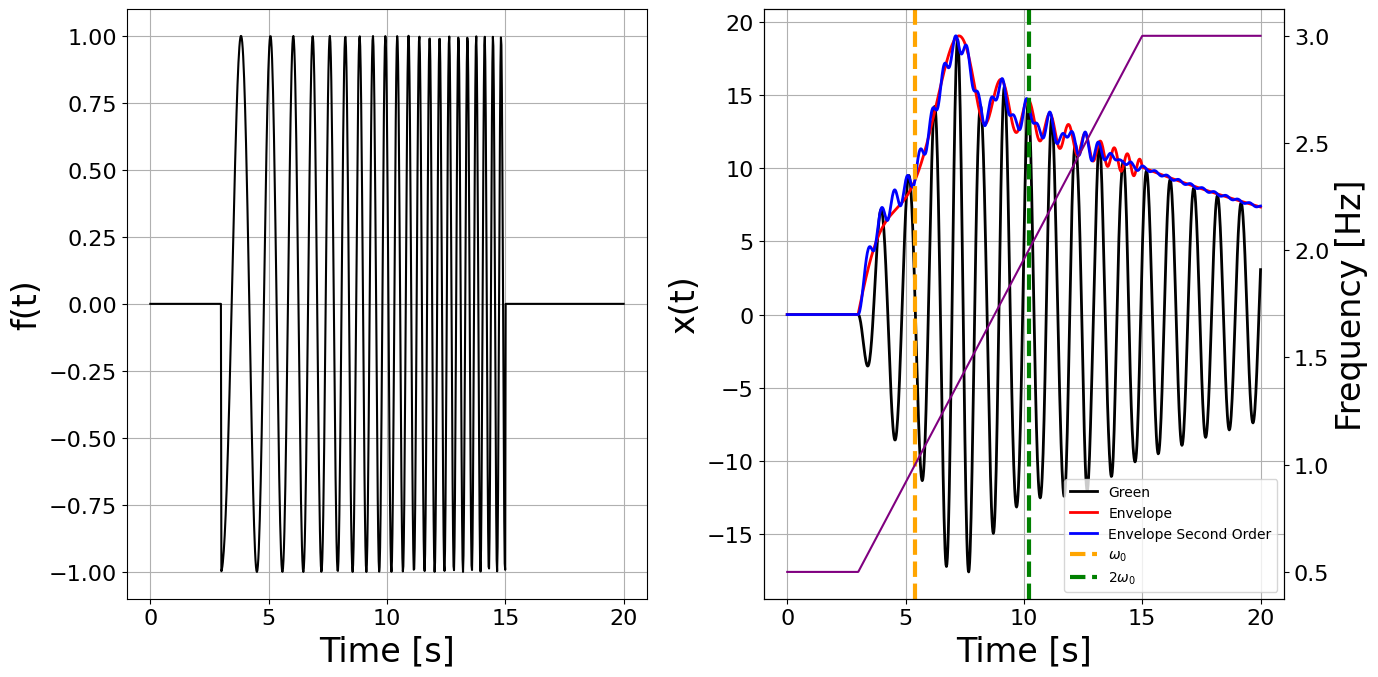

In [8]:
fig, ax = plt.subplots(1,2, figsize=(14,7))

t_f0 = time_at_frequency(t, omega_d_of_t, [omega0,2*omega0])

ax[0].plot(t, f_tot, color='k')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('f(t)')
ax[0].grid()

ax[1].plot(t, x, color='k', lw=2, label='Green')
ax[1].plot(t, np.abs(x_env), color='r', ls='-', lw=2, label='Envelope')
ax[1].plot(t, np.abs(x_so), color='b', ls='-', lw=2, label='Envelope Second Order')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('x(t)')
ax[1].axvline(t_f0[0], color='orange', lw=3, ls='--', label=r'$\omega_0$')
ax[1].axvline(t_f0[1], color='green', lw=3, ls='--', label=r'$2\omega_0$')
ax_twin = ax[1].twinx()
ax_twin.plot(t, f_t, color='purple', label='Frequency sweep')
ax_twin.set_ylabel('Frequency [Hz]')
ax[1].grid()
ax[1].legend()
fig.tight_layout()

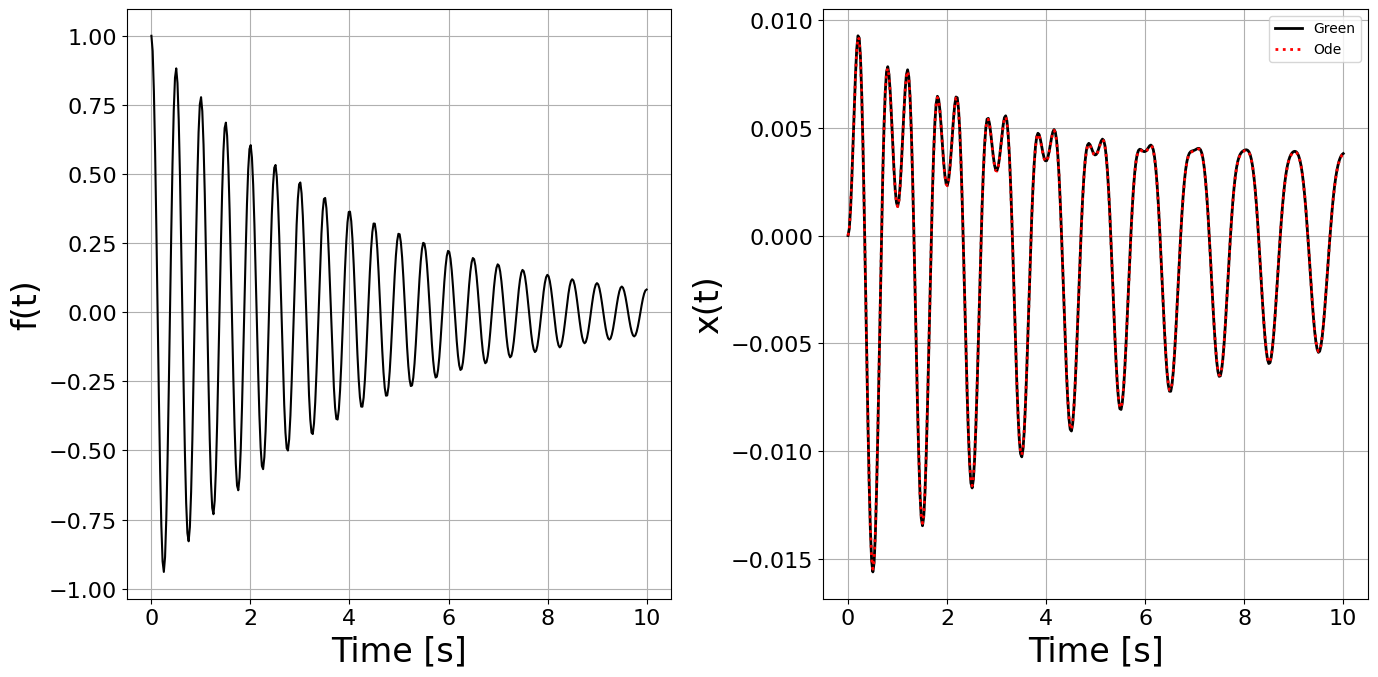

In [6]:
omega0 = 2*np.pi*1
mass = 1
gamma = 2*np.pi*0.01
t = np.linspace(0,10, 400)
f_t = np.cos(2*omega0*t)*np.exp(-t/4)
osc = DrivenHarmonicOscillator(omega0=omega0, gamma=gamma, m=mass)
x = osc.solve_via_green(t, f_t)
x_ode = osc.solve_direct_ode(t, f_t)

fig, ax = plt.subplots(1,2, figsize=(14,7))

ax[0].plot(t, f_t, color='k')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('f(t)')
ax[0].grid()

ax[1].plot(t, x, color='k', lw=2, label='Green')
ax[1].plot(t, x_ode, color='r', ls=':', lw=2, label='Ode')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('x(t)')
ax[1].grid()
ax[1].legend()
fig.tight_layout()

# Underdamped oscillator

In [38]:
omega0 = 2*np.pi*2
mass = 1
gamma = 2*np.pi*0.1
t = np.linspace(0,20, 1000)
f_t = np.cos(2*omega0*t)*np.exp(-t/2)

osc = DrivenHarmonicOscillator(omega0=omega0, gamma=gamma, m=mass)
x = osc.solve_via_green(t, f_t)

In [39]:
dt = t[1] - t[0] 
# real FFT (only positive frequencies)
F_w = rfft(f_t)
X_w = rfft(x)

# linear frequency axis (ν) and angular frequency axis (ω)
freq = rfftfreq(len(t), d=dt)    # ν in cycles per unit time

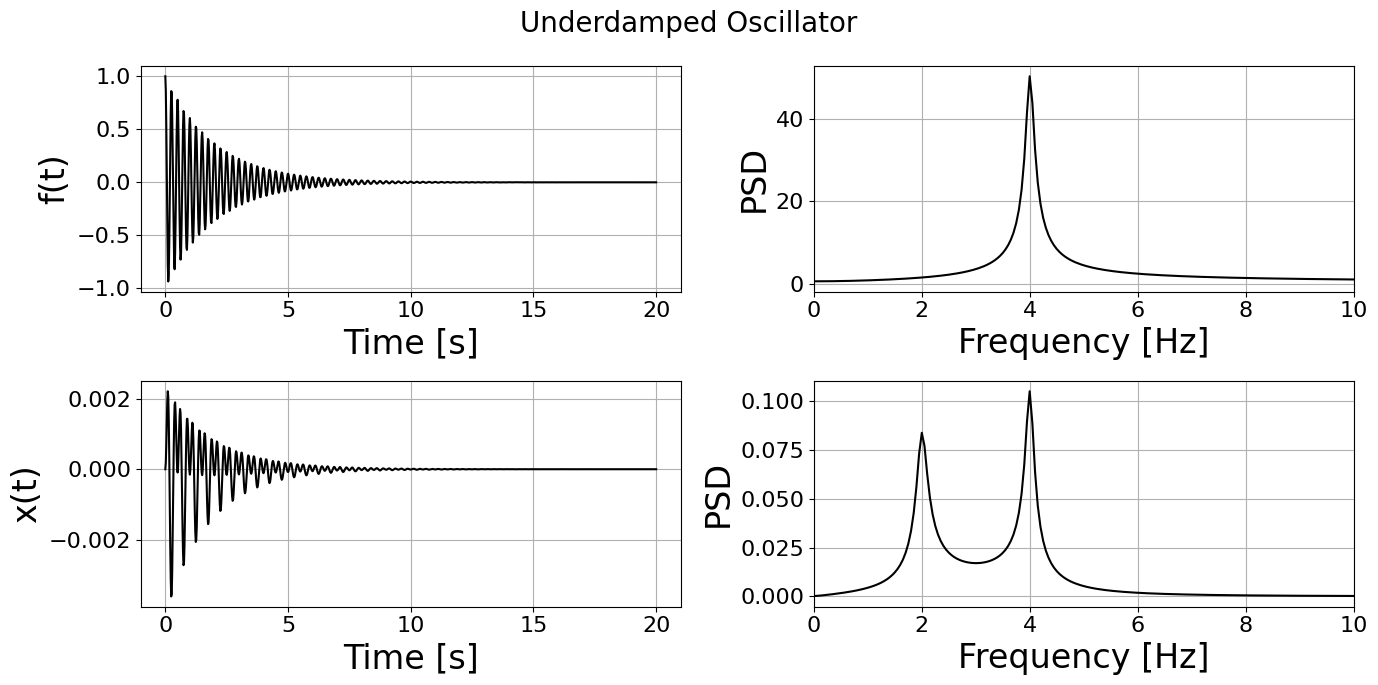

In [40]:
fig, ax = plt.subplots(2,2, figsize=(14,7))

ax[0,0].plot(t, f_t, color='k')
ax[0,0].set_xlabel('Time [s]')
ax[0,0].set_ylabel('f(t)')
ax[0,0].grid()

ax[1,0].plot(t, x, color='k')
ax[1,0].set_xlabel('Time [s]')
ax[1,0].set_ylabel('x(t)')
ax[1,0].grid()

ax[0,1].plot(freq,  np.abs(F_w), color='k')
ax[0,1].set_xlabel('Frequency [Hz]')
ax[0,1].set_ylabel('PSD')
ax[0,1].grid()
ax[0,1].set_xlim(0,10)

ax[1,1].plot(freq, np.abs(X_w), color='k')
ax[1,1].set_xlabel('Frequency [Hz]')
ax[1,1].set_ylabel('PSD')
ax[1,1].grid()
ax[1,1].set_xlim(0,10)
fig.suptitle('Underdamped Oscillator')

fig.tight_layout()


# Overdamped oscillator

In [41]:
omega0 = 2*np.pi*2
mass = 1
gamma = 2*np.pi*4

t = np.linspace(0,20, 1000)
f_t = np.cos(2*omega0*t)*np.exp(-t/2)
osc = DrivenHarmonicOscillator(omega0=omega0, gamma=gamma, m=mass)
x = osc.solve_via_green(t, f_t)

In [42]:
dt = t[1] - t[0] 
# real FFT (only positive frequencies)
F_w = rfft(f_t)
X_w = rfft(x)

# linear frequency axis (ν) and angular frequency axis (ω)
freq = rfftfreq(len(t), d=dt)    # ν in cycles per unit time

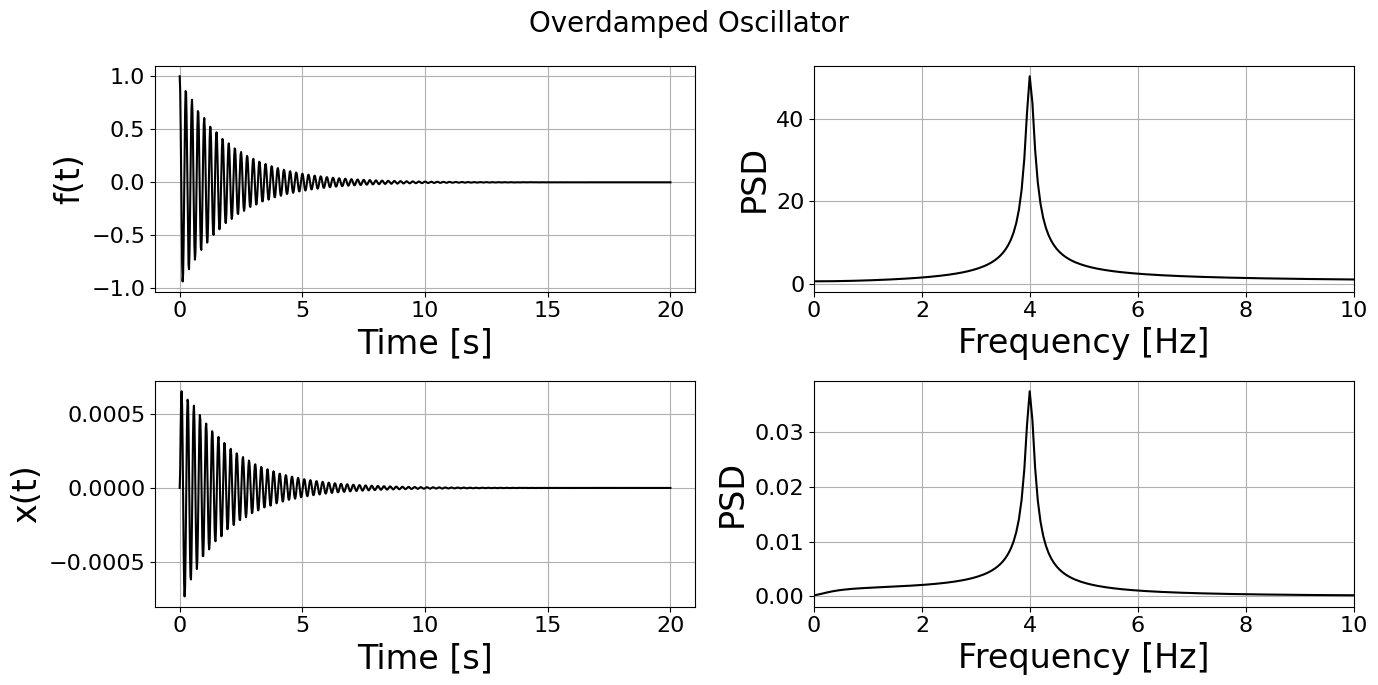

In [43]:
fig, ax = plt.subplots(2,2, figsize=(14,7))

ax[0,0].plot(t, f_t, color='k')
ax[0,0].set_xlabel('Time [s]')
ax[0,0].set_ylabel('f(t)')
ax[0,0].grid()

ax[1,0].plot(t, x, color='k')
ax[1,0].set_xlabel('Time [s]')
ax[1,0].set_ylabel('x(t)')
ax[1,0].grid()

ax[0,1].plot(freq,  np.abs(F_w), color='k')
ax[0,1].set_xlabel('Frequency [Hz]')
ax[0,1].set_ylabel('PSD')
ax[0,1].grid()
ax[0,1].set_xlim(0,10)

ax[1,1].plot(freq, np.abs(X_w), color='k')
ax[1,1].set_xlabel('Frequency [Hz]')
ax[1,1].set_ylabel('PSD')
ax[1,1].grid()
ax[1,1].set_xlim(0,10)
fig.suptitle('Overdamped Oscillator')

fig.tight_layout()


In [12]:
omega0 = 2*np.pi*2
mass = 1
gamma = 2*np.pi*0.1

t = np.linspace(0,20, 10000)
f_t = np.cos(2*np.pi*3*t)
osc = DrivenHarmonicOscillator(omega0=omega0, gamma=gamma, mass=mass)
x = osc.solve_via_green(t, f_t)

In [13]:
dt = t[1] - t[0] 
# real FFT (only positive frequencies)
F_w = rfft(f_t)
X_w = rfft(x)

# linear frequency axis (ν) and angular frequency axis (ω)
freq = rfftfreq(len(t), d=dt)    # ν in cycles per unit time

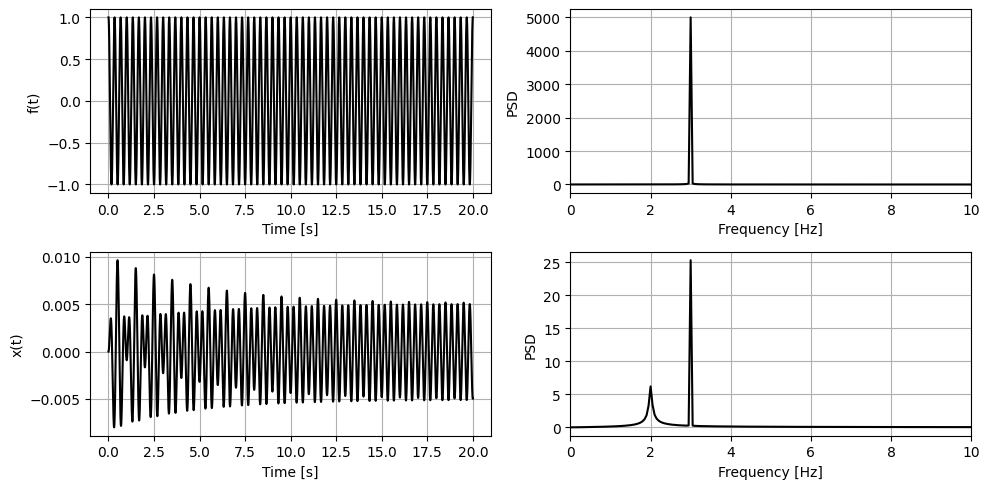

In [14]:
fig, ax = plt.subplots(2,2, figsize=(10,5))

ax[0,0].plot(t, f_t, color='k')
ax[0,0].set_xlabel('Time [s]')
ax[0,0].set_ylabel('f(t)')
ax[0,0].grid()

ax[1,0].plot(t, x, color='k')
ax[1,0].set_xlabel('Time [s]')
ax[1,0].set_ylabel('x(t)')
ax[1,0].grid()

ax[0,1].plot(freq,  np.abs(F_w), color='k')
ax[0,1].set_xlabel('Frequency [Hz]')
ax[0,1].set_ylabel('PSD')
ax[0,1].grid()
ax[0,1].set_xlim(0,10)

ax[1,1].plot(freq, np.abs(X_w), color='k')
ax[1,1].set_xlabel('Frequency [Hz]')
ax[1,1].set_ylabel('PSD')
ax[1,1].grid()
ax[1,1].set_xlim(0,10)

fig.tight_layout()


# Critically damped oscillator

In [44]:
omega0 = 2*np.pi*2
mass = 1
gamma = 2*np.pi*2

t = np.linspace(0,20, 2000)
f_t = np.cos(2*omega0*t)*np.exp(-t/2)
osc = DrivenHarmonicOscillator(omega0=omega0, gamma=gamma, m=mass)
x = osc.solve_via_green(t, f_t)

In [45]:
dt = t[1] - t[0] 
# real FFT (only positive frequencies)
F_w = rfft(f_t)
X_w = rfft(x)

# linear frequency axis (ν) and angular frequency axis (ω)
freq = rfftfreq(len(t), d=dt)    # ν in cycles per unit time

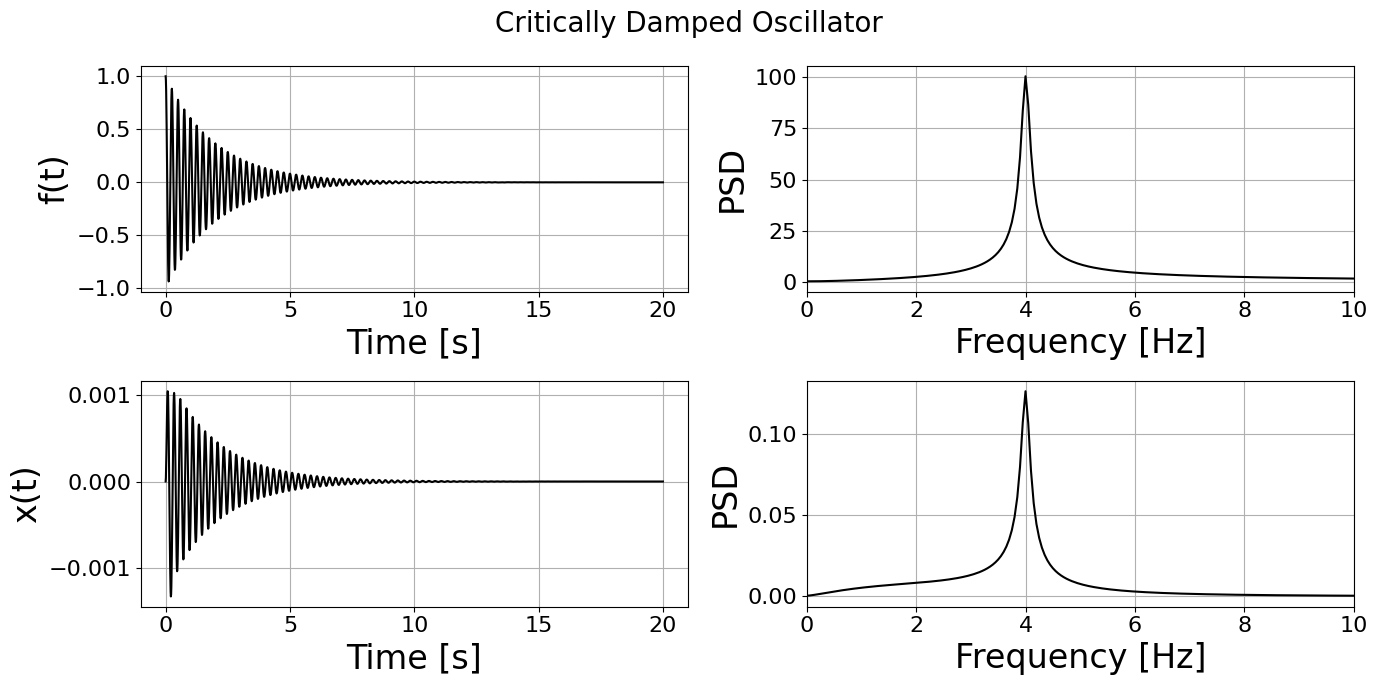

In [46]:
fig, ax = plt.subplots(2,2, figsize=(14,7))

ax[0,0].plot(t, f_t, color='k')
ax[0,0].set_xlabel('Time [s]')
ax[0,0].set_ylabel('f(t)')
ax[0,0].grid()

ax[1,0].plot(t, x, color='k')
ax[1,0].set_xlabel('Time [s]')
ax[1,0].set_ylabel('x(t)')
ax[1,0].grid()

ax[0,1].plot(freq,  np.abs(F_w), color='k')
ax[0,1].set_xlabel('Frequency [Hz]')
ax[0,1].set_ylabel('PSD')
ax[0,1].grid()
ax[0,1].set_xlim(0,10)

ax[1,1].plot(freq, np.abs(X_w), color='k')
ax[1,1].set_xlabel('Frequency [Hz]')
ax[1,1].set_ylabel('PSD')
ax[1,1].grid()
ax[1,1].set_xlim(0,10)
fig.suptitle('Critically Damped Oscillator')
fig.tight_layout()


# Change the driving frequency

In [9]:
omega0 = 2*np.pi*4
mass = 1
gamma = 2*np.pi*0.02

t = np.linspace(0,5, 2000)
osc = DrivenHarmonicOscillator(omega0=omega0, gamma=gamma, m=mass)


In [17]:
w_drives = np.linspace(3.5,4.5, 50)*np.pi*2
X = np.zeros(shape=(len(w_drives), len(t)))
for i,wd in enumerate(w_drives):
    print(f'{(i+1)/len(w_drives)*100:.2f} %', end='\r')
    f_t = np.cos(wd*t)#*np.exp(-t/2)
    x = osc.solve_via_green(t, f_t)
    X[i,:] = x


24.00 %

KeyboardInterrupt: 

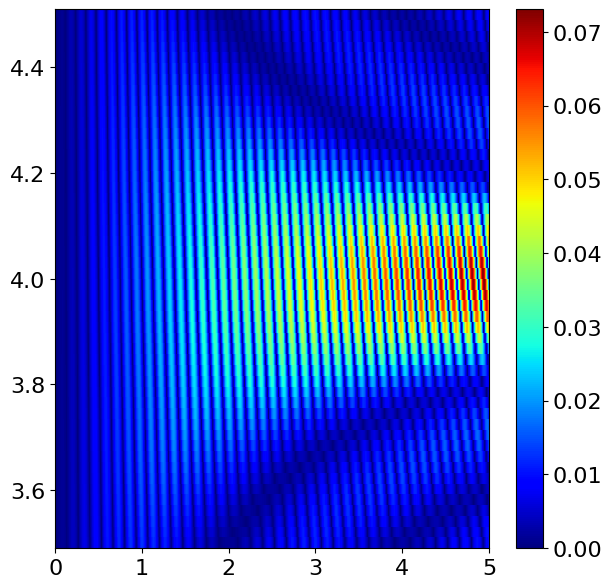

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
cb = ax.pcolormesh(t, w_drives/2/np.pi, np.abs(X), cmap='jet')
fig.colorbar(cb, ax=ax)

In [16]:
w_drives = np.linspace(3.5,4.5, 50)*np.pi*2
X = np.zeros(shape=(len(w_drives), len(t)), dtype=complex)
for i,wd in enumerate(w_drives):
    print(f'{(i+1)/len(w_drives)*100:.2f} %', end='\r')
    f_t = np.ones_like(t)#*np.exp(-t/2)
    x = osc.solve_envelope_ode_second_order(t, f_t, wd*np.ones_like(t))
    X[i,:] = x


18.00 %

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
cb = ax.pcolormesh(t, w_drives/2/np.pi, np.abs(X), cmap='jet')
fig.colorbar(cb, ax=ax)

# Long time simulation

In [122]:
omega0 = 2*np.pi*4
mass = 1
gamma = 2*np.pi*0.0001

t = np.linspace(0,40, 2000)

osc = DrivenHarmonicOscillator(omega0=omega0, gamma=gamma, m=mass)


In [123]:
w_drives = np.linspace(3.5,4.5, 101)*np.pi*2
X = np.zeros(shape=(len(w_drives), len(t)), dtype=complex)
for i,wd in enumerate(w_drives):
    print(f'{(i+1)/len(w_drives)*100:.2f} %', end='\r')
    f_env = np.ones_like(t)#*np.exp(-t/2)
    x_env = osc.solve_envelope_ode(t, f_env, wd)
    X[i,:] = x_env


100.00 %

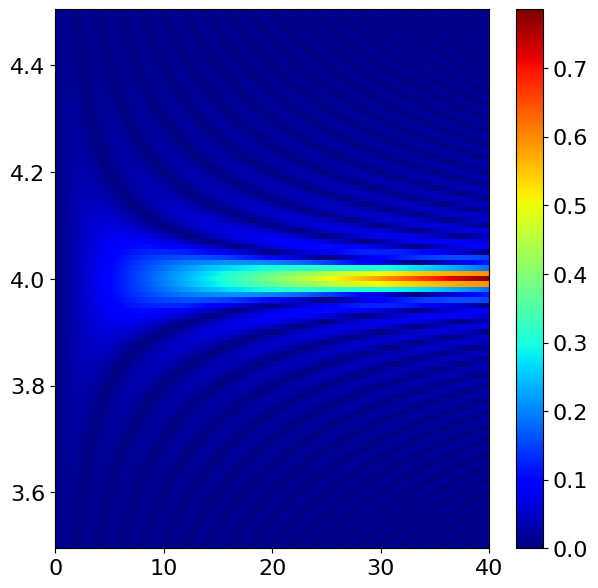

In [124]:
fig, ax = plt.subplots(figsize=(7,7))
cb = ax.pcolormesh(t, w_drives/2/np.pi, np.abs(X), cmap='jet')
fig.colorbar(cb, ax=ax)

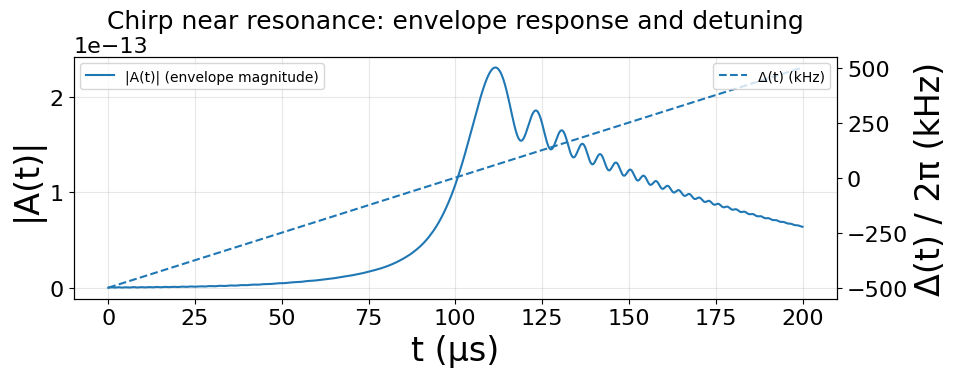

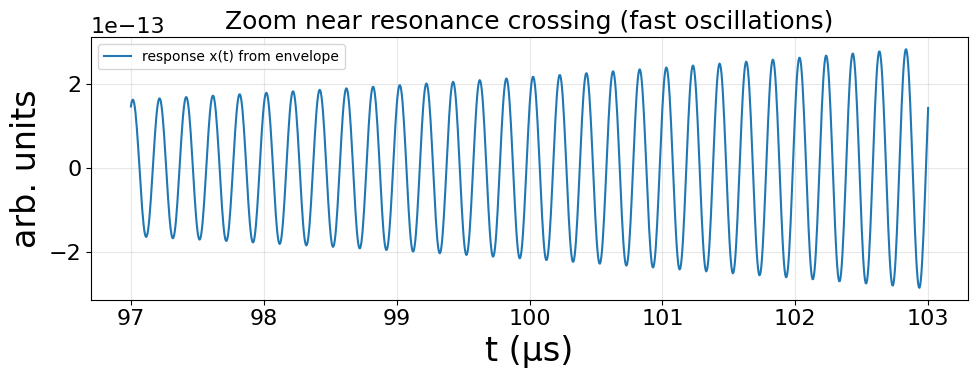

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def solve_envelope_via_green(
    t,
    gamma,
    omega0,
    force_env,
    delta_t,
    m=1.0,
    A0=0.0 + 0.0j,
    A1=0.0 + 0.0j,
    return_parts=False,
    method="fft",
):
    t = np.asarray(t)
    force_env = np.asarray(force_env)
    delta_t = np.asarray(delta_t)

    if t.ndim != 1:
        raise ValueError("t must be 1D")
    if force_env.shape != t.shape or delta_t.shape != t.shape:
        raise ValueError("force_env and delta_t must have the same shape as t")
    if len(t) < 2:
        raise ValueError("t must have at least 2 points")

    dt = t[1] - t[0]
    if not np.allclose(np.diff(t), dt, rtol=1e-10, atol=1e-15):
        raise ValueError("t must be uniformly spaced")

    # θ(t) = ∫ Δ(t) dt (left Riemann sum; no trapezoid)
    theta = np.empty_like(t, dtype=float)
    theta[0] = 0.0
    theta[1:] = np.cumsum(delta_t[:-1]) * dt

    # Source term for the envelope equation
    s = (force_env / m) * np.exp(-1j * theta)

    # Green's function samples
    a = gamma - 1j * omega0
    Omega = np.sqrt(omega0**2 - gamma**2 + 0j)

    tau = t - t[0]
    if np.abs(Omega) == 0:
        g = np.exp(-a * tau) * tau
    else:
        g = np.exp(-a * tau) * (np.sin(Omega * tau) / Omega)

    # Causal convolution
    N = len(t)
    if method == "direct":
        conv = dt * np.convolve(s, g, mode="full")[:N]
    elif method == "fft":
        L = 1 << int(np.ceil(np.log2(2 * N - 1)))
        conv = dt * np.fft.ifft(np.fft.fft(s, n=L) * np.fft.fft(g, n=L))[:N]
    else:
        raise ValueError('method must be "fft" or "direct"')

    # Homogeneous part from A(t0)=A0, A'(t0)=A1
    if np.abs(Omega) == 0:
        C = A0
        D = A1 + a * A0
        A_hom = np.exp(-a * tau) * (C + D * tau)
    else:
        C = A0
        D = (A1 + a * A0) / Omega
        A_hom = np.exp(-a * tau) * (C * np.cos(Omega * tau) + D * np.sin(Omega * tau))

    A = A_hom + conv
    if return_parts:
        return A, A_hom, conv, g, s, theta
    return A

# ----------------------------
# Example: chirp near resonance
# ----------------------------
omega0 = 2 * np.pi * 5e6      # 5 MHz resonance
gamma  = 2 * np.pi * 2e3      # ~2 kHz linewidth (angular)
T = 200e-6                    # 200 us
dt = 5e-9                     # 5 ns
N = int(np.round(T / dt)) + 1
t = np.linspace(0, T, N)

# Force envelope: smooth Gaussian turn-on/off around the middle
sigma = 40e-6
force_env = np.exp(-(t - T/2)**2 / (2 * sigma**2))

# Detuning chirp: sweep across resonance +/- 50 kHz
Delta_max = 2 * np.pi * 500e3
delta_t = np.linspace(-Delta_max, +Delta_max, N)   # Δ(t) = ω_d(t) - ω0

# Solve envelope
A, A_hom, A_forced, g, s, theta = solve_envelope_via_green(
    t, gamma, omega0, force_env, delta_t, return_parts=True, method="fft"
)

# Reconstruct a "full" real displacement-like signal from the envelope:
x_full = 2 * np.real(A * np.exp(-1j * omega0 * t))

# Build the corresponding real driving force signal f(t)=B(t) cos(phi(t)), with phi' = ω_d(t)
omega_d = omega0 + delta_t
phi = np.empty_like(t)
phi[0] = 0.0
phi[1:] = np.cumsum(omega_d[:-1]) * dt
f_full = np.real(force_env * np.exp(-1j * phi))

# Plot 1: Envelope magnitude vs time, with detuning shown on a second y-axis
fig1 = plt.figure(figsize=(10, 4))
ax1 = plt.gca()
ax1.plot(t * 1e6, np.abs(A), label="|A(t)| (envelope magnitude)")
ax1.set_xlabel("t (µs)")
ax1.set_ylabel("|A(t)|")
ax1.grid(True, alpha=0.3)
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(t * 1e6, delta_t / (2*np.pi*1e3), linestyle="--", label="Δ(t) (kHz)")
ax2.set_ylabel("Δ(t) / 2π (kHz)")
ax2.legend(loc="upper right")
plt.title("Chirp near resonance: envelope response and detuning")
plt.tight_layout()
plt.show()

# Plot 2: A short zoom-in on the full drive and response (shows fast oscillations)
# pick a window around resonance crossing (Δ ~ 0 at mid-time)
t_mid = T/2
win = 6e-6  # 6 us window
mask = (t >= t_mid - win/2) & (t <= t_mid + win/2)

plt.figure(figsize=(10, 4))
# plt.plot(t[mask] * 1e6, f_full[mask], label="drive f(t)")
plt.plot(t[mask] * 1e6, x_full[mask], label="response x(t) from envelope")
plt.xlabel("t (µs)")
plt.ylabel("arb. units")
plt.grid(True, alpha=0.3)
plt.legend()
plt.title("Zoom near resonance crossing (fast oscillations)")
plt.tight_layout()
plt.show()
